# Train OCR su text Detector

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrKz-2019-04-26.zip
unzip autoriaNumberplateOcrKz-2019-04-26.zip
mv autoriaNumberplateOcrKz-2019-04-26 kz
```
or use your own dataset.

In [5]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [6]:
import os
import sys
import json
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "su"
VERSION = "2020_10_23_tensorflow_v2.3"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [7]:
class su(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 
                        'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Э', 'Ю', 'Я']
        
        self.EPOCHS = 2
        

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'9', '7', 'П', 'З', 'Д', 'Р', 'А', '1', 'Х', 'Т', '6', 'Л', '0', '8', '3', 'Я', '4', 'М', 'Ч', 'Э', 'Ю', 'Б', '2', 'Щ', 'Е', 'Ц', 'К', 'О', 'В', 'И', 'Г', 'С', 'Ж', 'Ш', 'Н', 'У', '5', 'Ф'}
Letters val  {'7', 'П', '9', 'З', 'Д', 'Р', 'А', '1', 'Х', 'Т', '6', 'Л', '0', '8', '3', '4', 'Я', 'М', 'Ч', 'Э', 'Ю', '2', 'Б', 'Щ', 'Е', 'Ц', 'К', 'В', 'О', 'И', 'Г', 'С', 'Ж', 'Ш', 'Н', 'У', '5', 'Ф'}
Letters test  {'9', '7', 'П', 'З', 'Д', 'Р', 'А', '1', 'Х', 'Т', '6', 'Л', '0', '8', '3', '4', 'Я', 'М', 'Ч', 'Э', 'Ю', '2', 'Б', 'Щ', 'Е', 'Ц', 'К', 'В', 'О', 'И', 'Г', 'С', 'Ж', 'Ш', 'Н', 'У', '5', 'Ф'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Щ Э Ю Я

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) th

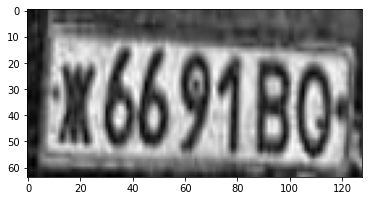

2) the_labels (plate number): Ж6691ВО is encoded as [16, 6, 6, 9, 1, 12, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED
CPU times: user 6min 25s, sys: 1min 19s, total: 7min 44s
Wall time: 36.1 s


In [8]:
%%time
ocrTextDetector = su()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [14]:
%%time
model = ocrTextDetector.train()


START TRAINING
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_su (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_su[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
____________________________________________________________________________

In [15]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 Н4656МТ
True: 			 Н9026МТ

Predicted: 		 Т5063КР
True: 			 Т5083КР

Predicted: 		 У1379ЛД
True: 			 П1379ЛД

Predicted: 		 С1840МН
True: 			 С1640МН

Predicted: 		 О46514ККЕ
True: 			 Я4451КШ

Predicted: 		 А0220Б
True: 			 А0220БА

Predicted: 		 Е8471ПО
True: 			 Е8471ПС

Predicted: 		 А7722ММ
True: 			 И7722ММ

Predicted: 		 А0918ВХ
True: 			 А0916ВХ

Predicted: 		 Е1951РВ
True: 			 Е1951РЯ

Predicted: 		 6965КП
True: 			 6965КУП

Predicted: 		 2188Б
True: 			 2188БЕБ

Predicted: 		 С6624ЛП
True: 			 С6624ДП

Predicted: 		 М9002МИ
True: 			 М9002МЖ

Predicted: 		 Ч0064ТК
True: 			 Ч0064ТЮ

Predicted: 		 7550СТ
True: 			 7550ПЕТ

Predicted: 		 В7714А
True: 			 О7714СА

Predicted: 		 Б2871НБ
True: 			 Я2871НБ

Predicted: 		 Ю8402МН
True: 			 Ю6402МН

Predicted: 		 Ш4525ЛД
True: 			 Ш4225ЛД

Predicted: 		 Б5908КЖ
True: 			 Б5908АХ

Predicted: 		 М5123ДП
True: 			 Ф5123ДП

Predicted: 		 З2563МК
True: 			 Э2563МК

Predicted: 		 Е3946НА
True: 			 Е3946КА

Predicted

In [16]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_su_2020_10_23_tensorflow_v2.2.h5


GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'9', '7', 'П', 'З', 'Д', 'Р', 'А', '1', 'Х', 'Т', '6', 'Л', '0', '8', '3', 'Я', '4', 'М', 'Ч', 'Э', 'Ю', 'Б', '2', 'Щ', 'Е', 'Ц', 'К', 'О', 'В', 'И', 'Г', 'С', 'Ж', 'Ш', 'Н', 'У', '5', 'Ф'}
Letters val  {'7', 'П', '9', 'З', 'Д', 'Р', 'А', '1', 'Х', 'Т', '6', 'Л', '0', '8', '3', '4', 'Я', 'М', 'Ч', 'Э', 'Ю', '2', 'Б', 'Щ', 'Е', 'Ц', 'К', 'В', 'О', 'И', 'Г', 'С', 'Ж', 'Ш', 'Н', 'У', '5', 'Ф'}
Letters test  {'9', '7', 'П', 'З', 'Д', 'Р', 'А', '1', 'Х', 'Т', '6', 'Л', '0', '8', '3', '4', 'Я', 'М', 'Ч', 'Э', 'Ю', '2', 'Б', 'Щ', 'Е', 'Ц', 'К', 'В', 'О', 'И', 'Г', 'С', 'Ж', 'Ш', 'Н', 'У', '5', 'Ф'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Щ Э Ю Я

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) th

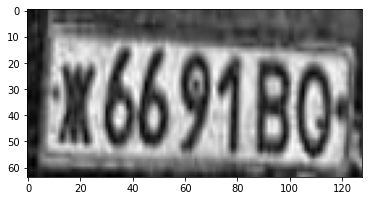

2) the_labels (plate number): Ж6691ВО is encoded as [16, 6, 6, 9, 1, 12, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_su (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_su[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________________

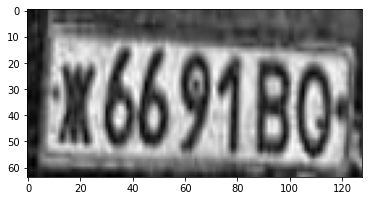

2) the_labels (plate number): Ж6691ВО is encoded as [16, 6, 6, 9, 1, 12, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_su (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_su[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________________

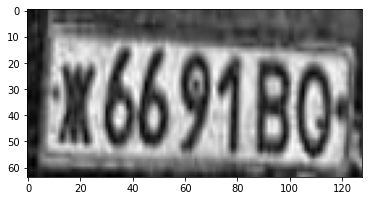

2) the_labels (plate number): Ж6691ВО is encoded as [16, 6, 6, 9, 1, 12, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_su (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_su[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________________

In [12]:
# Train with aug
for i in range(3):
    ocrTextDetector = su()
    ocrTextDetector.EPOCHS = 2

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True)
    
    ocrTextDetector.test(verbose=True)

In [13]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 У3959Н
True: 			 У3959НБ

Predicted: 		 Я451ККЕ
True: 			 Я4451КШ

Predicted: 		 А0220Б
True: 			 А0220БА

Predicted: 		 Н7722ММ
True: 			 И7722ММ

Predicted: 		 2188Б
True: 			 2188БЕБ

Predicted: 		 7550ПСТ
True: 			 7550ПЕТ

Predicted: 		 А5123ДП
True: 			 Ф5123ДП

Predicted: 		 Ж4519РЯ
True: 			 Д4519РЯ

Predicted: 		 4081ММ
True: 			 4081МАМ

Predicted: 		 3852ДН
True: 			 3852ДНН

Predicted: 		 Л5822РЯ
True: 			 П5822РЯ

Predicted: 		 И4510МО
True: 			 Щ4510МО

Predicted: 		 7844ВВО
True: 			 7844ВВФ

Predicted: 		 8580ДХ
True: 			 8580ВДХ

Predicted: 		 1822УВ
True: 			 1822БУВ

Predicted: 		 0015МЧ
True: 			 0015МЕЧ

Predicted: 		 9808ТВ
True: 			 9808ТТВ

Predicted: 		 В2989Н
True: 			 В2989ЧУ

Predicted: 		 Ж0981КУ
True: 			 Ж0981КЖ

Predicted: 		 А6825ГО
True: 			 Л6825ГО

Predicted: 		 Е9061К
True: 			 Е9061КК

Predicted: 		 5170АЕ
True: 			 5170БАЕ

Predicted: 		 Л8923БЕ
True: 			 К8923БЕ

Predicted: 		 Э4470К
True: 			 Э4470КК

Predicted: 		 0800Д

In [14]:
# ocrTextDetector.save(os.path.join(NOMEROFF_NET_DIR, 
#                                   "models/", 'anpr_ocr_aug_{}_{}_v2.h5'.format(DATASET_NAME, VERSION)), verbose=True)
# # anpr_ocr_aug_su_2020_10_20_tensorflow_v2.h5 current name of anpr_ocr_aug_su_2020_08_26_tensorflow_v2_v2.h5
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_su_2020_10_23_tensorflow_v2.3.h5


In [9]:
ocrTextDetector.load(RESULT_MODEL_PATH, verbose=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_su (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_su[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
______________________________________________________________________________________________